## Understanding Convolutional Filters

In [2]:
# dependices
# math and image libraries
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt 
# computer vision library
import torch 
import torch.nn.functional as F 
from torchvision import transforms as tf  

In [3]:
# load in the image
img = Image.open("images/headshot.jpg").convert('RGB')

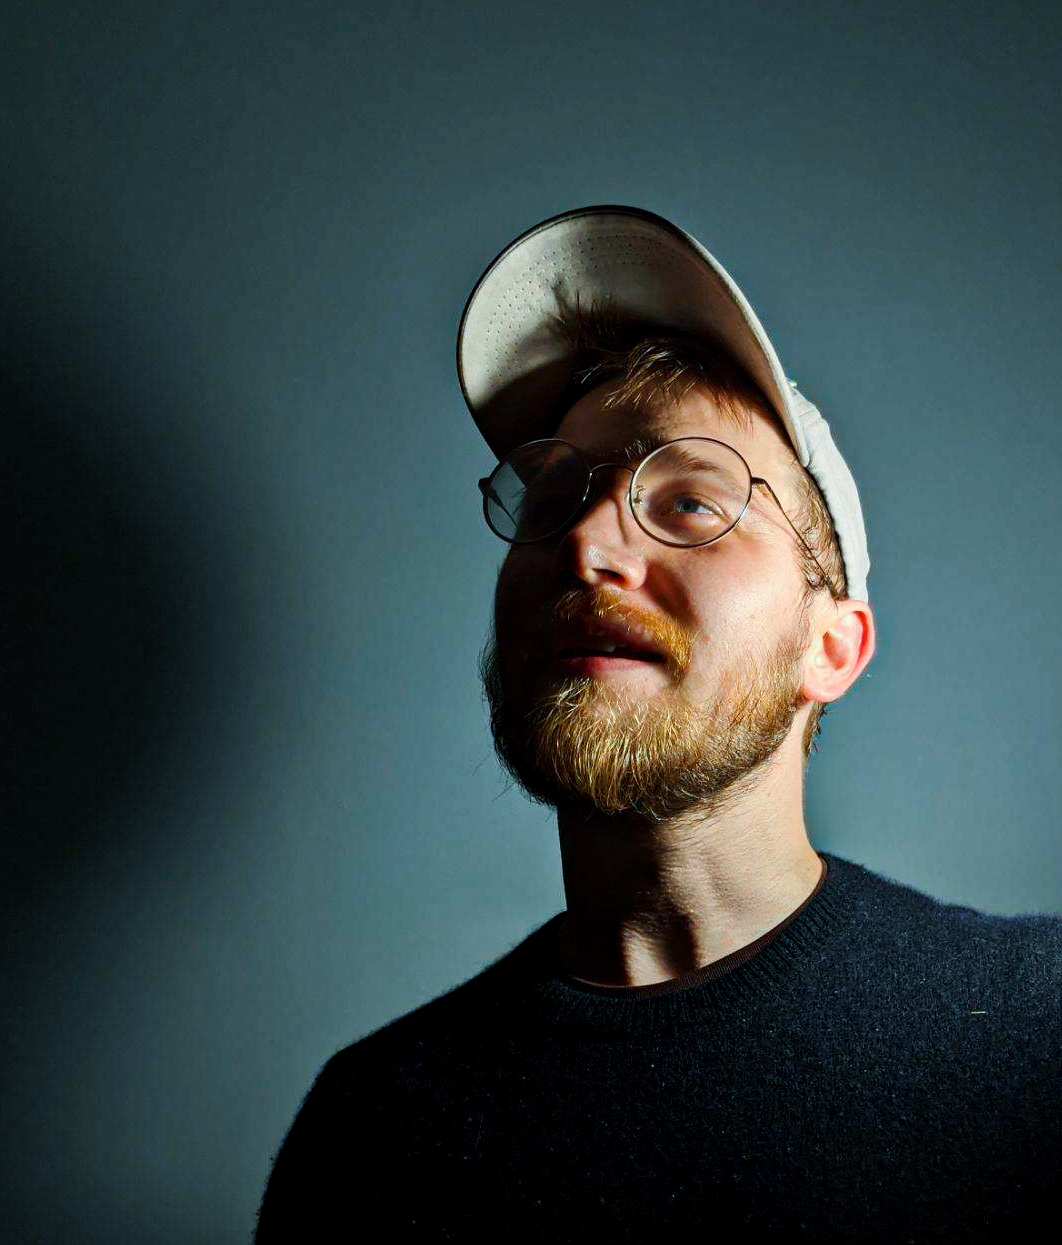

In [4]:
# display the image (headshot!)
img

In [11]:
# transform image into tensor
transforms = tf.Compose([tf.Resize(256),
                         tf.ToTensor()])

img_tensor = transforms(img)
# add batch dimension
img_tensor = img_tensor.unsqueeze(0)
# batch, channels, height, width
img_tensor.shape

torch.Size([1, 3, 300, 256])

## Kernel Filters

In [6]:
# sharpen kernel matrix
sharpen_kernel = [[[[0, -1, 0]],
                   [[-1, 5, -1]],
                   [[0, -1, 0]]]]

# horizontal kernel matrix
horizontal_kernel = [[[[1, 0, -1]],
                      [[0, 0 ,0]],
                      [[-1, 0, 1]]]]

# vertical line kernel matrix
vertical_line_kernel = [[[[0, 1, 0]],
                         [[1, -4, 1]],
                         [[0, 1, 0]]]]

# edge detection kernel matrix
edge_detection_kernel = [[[[-1, -1, -1]],
                          [[-1, 8, -1]],
                          [[-1, -1, -1]]]]


In [12]:
def show_feature_map(kernel, img_tensor):

    '''
    Input: kernel matrix and image tensor
    Return: image tensor convolved with kernel filter
    '''
    # transform kernel into tensor
    kernel_filter = torch.Tensor(kernel)
    # convolve the image with filter
    conv_img = F.conv2d(img_tensor, kernel_filter, padding=0)   
    # remove batching dimension and return to numpy
    conv_img = conv_img[0, :, :, :]
    conv_img = conv_img.numpy().squeeze()

    return conv_img

In [13]:
# generate feature maps
sharpened_feat_map = show_feature_map(kernel=sharpen_kernel, img_tensor=img_tensor)
horizontal_feat_map = show_feature_map(kernel=horizontal_kernel, img_tensor=img_tensor)
vertical_feat_map = show_feature_map(kernel=vertical_line_kernel, img_tensor=img_tensor)
edge_feat_map = show_feature_map(kernel=edge_detection_kernel, img_tensor=img_tensor)

## Show Feature Maps

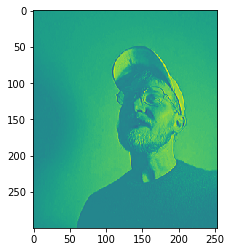

In [14]:
plt.imshow(sharpened_feat_map)

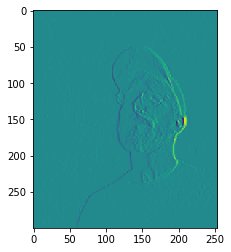

In [15]:
plt.imshow(horizontal_feat_map)

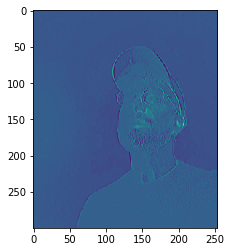

In [16]:
plt.imshow(vertical_feat_map)

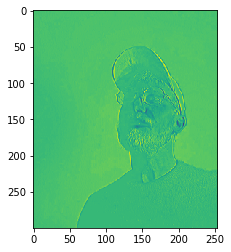

In [18]:
plt.imshow(edge_feat_map)

## Experiment with Filters

In [19]:
# filter experimemts
kernel_1 = [[[[0, -2, 0]],
             [[-1, 6, -2]],
             [[0, -1, 0]]]]


kernel_2 = [[[[1, -1, 0]],
             [[0, 0 ,0]],
             [[0, -1, 1]]]]


kernel_3 = [[[[-1, 2, 0]],
             [[2, -8, 2]],
             [[0, 2, -1]]]]


kernel_4 = [[[[0, -1, -1]],
             [[-1, 0, -1]],
             [[-1, -1, 0]]]]

kernel_5 = [[[[8, -1, -1]],
             [[0, 8, 0]],
             [[-1, -1, 8]]]]            

In [20]:
# generate feature maps
one_feat_map = show_feature_map(kernel=kernel_1, img_tensor=img_tensor)
two_feat_map = show_feature_map(kernel=kernel_2, img_tensor=img_tensor)
three_feat_map = show_feature_map(kernel=kernel_3, img_tensor=img_tensor)
four_feat_map = show_feature_map(kernel=kernel_4, img_tensor=img_tensor)
five_feat_map = show_feature_map(kernel=kernel_5, img_tensor=img_tensor)

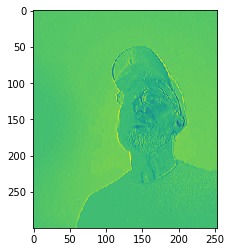

In [21]:
plt.imshow(one_feat_map)

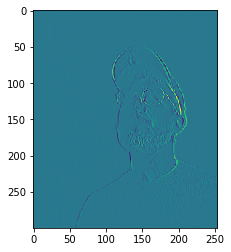

In [22]:
plt.imshow(two_feat_map)

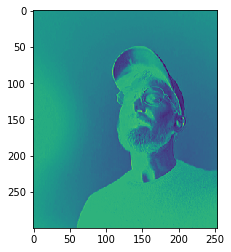

In [23]:
plt.imshow(three_feat_map)

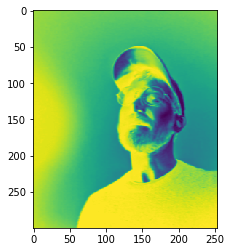

In [24]:
plt.imshow(four_feat_map)

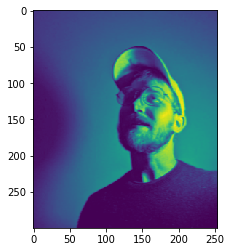

In [25]:
plt.imshow(five_feat_map)